# 「葡萄牙-蒙特西尼奧自然公園」森林大火 分析
##   —            觀察森林大火因子間的相互關係

In [225]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts

In [183]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# 各項數值意義
* x,y   依照「葡萄牙-蒙特西尼奧自然公園」地圖，劃分之區域
* month 月份
* day   星期
* FFMC  該地區之細小可燃物濕度(FWI制)
* DMC   該地區之二甲基碳酸酯濃度(FWI制)
* DC    該地區之乾旱指數(FWI制)
* ISI   火勢之初始擴散率(FWI制)
* temp  氣溫(攝氏)
* RH    空氣濕度(%)
* wind  風速(km/h)
* rain  降雨量(mm/m2)
* area  火勢燃燒區域

![地圖](The-map-of-Montesinho-natural-park.png) 

In [184]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# 觀察各項變數間之相關性

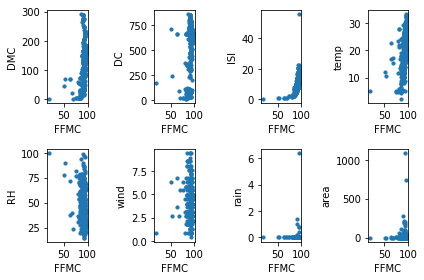

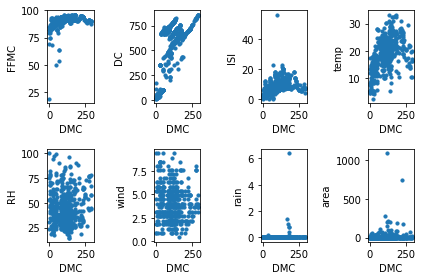

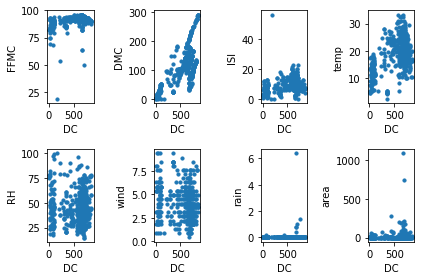

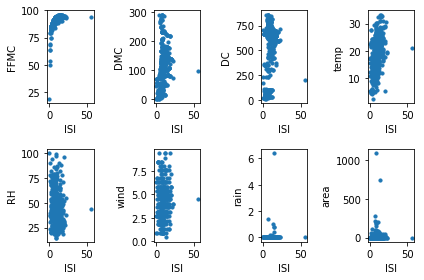

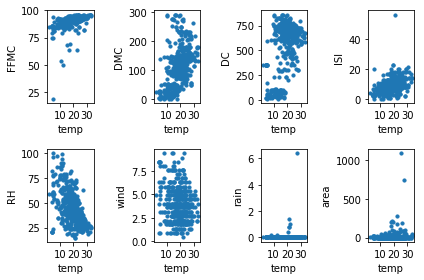

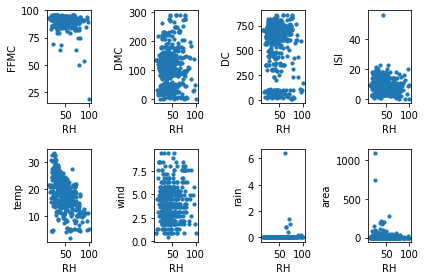

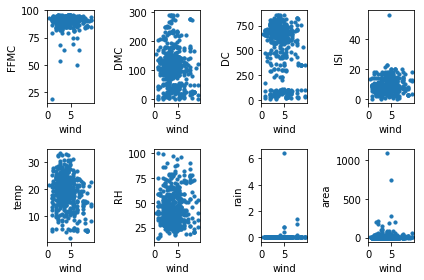

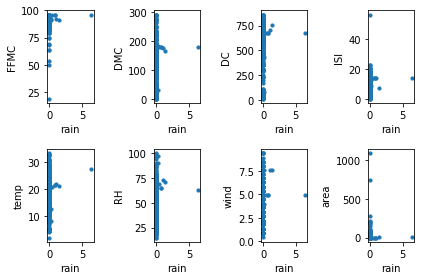

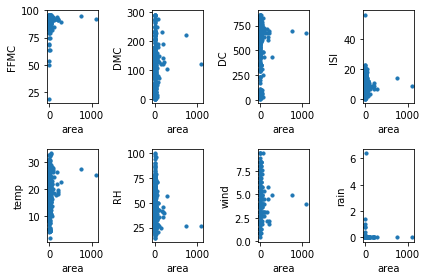

In [185]:
title=list(['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'])
data=list(np.zeros(9))

for i in range(0,9):
    data[i]=df[title[i]]

data=np.array(data)


for i in range(0,9):
    title_1=list(['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'])
    data_1=data
    
    x_axis=title_1[i]
    x_data=data_1[i]
    
    data_1=np.delete(data_1,i,0)
    title_1.remove(title_1[i])
    
    for j in range(0,8):
        plt.subplot(2, 4, j+1)
        plt.scatter(x_data,data_1[j],s=10)
        
        plt.xlabel(x_axis)
        plt.ylabel(title_1[j])
    
        
    plt.tight_layout()
    plt.show()

# 其中兩項較適合做線性回歸
* DC-DMC
* RH-temp

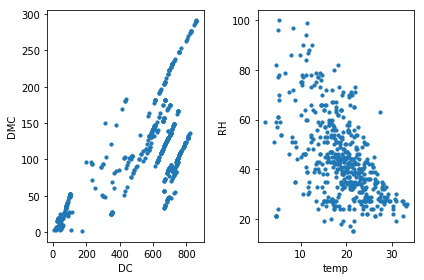

In [189]:
DMC=data[1]
DC=data[2]
temp=data[4]
RH=data[5]

plt.subplot(1,2,1)
plt.scatter(DC_data,DMC_data,s=10)       
plt.xlabel('DC')
plt.ylabel('DMC')

plt.subplot(1,2,2)
plt.scatter(temp_data,RH_data,s=10)     
plt.xlabel('temp')
plt.ylabel('RH')

        
plt.tight_layout()
plt.show()

# 開始做訓練
## 1.訓練DC-DMC

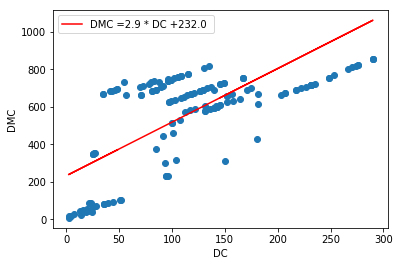

In [222]:
regr=LR()

DMC_data=DMC.reshape(len(DMC),1)
DC_data=DC.reshape(len(DC),1)

DMC_train,DMC_test,DC_train,DC_test=tts(DMC_data,DC_data,test_size=0.3,random_state=87)

regr.fit(DMC_train,DC_train)
DC_predict=regr.predict(DMC_test)


#計算預測出之方程式
x1=1
x2=2

y1=regr.predict(x1)
y2=regr.predict(x2)

slope=(y2-y1)/(x2-x1)
constant=y1-slope*x1

plt.scatter(DMC_test,DC_test)
equation, =plt.plot(DMC_test,DC_predict,'r')
plt.xlabel('DC')
plt.ylabel('DMC')

plt.legend(handles=[equation],
           labels=['DMC =%.1f * DC +%.1f ' % (slope,constant)],
           loc='upper left')

plt.show()

## 2.訓練RH-temp

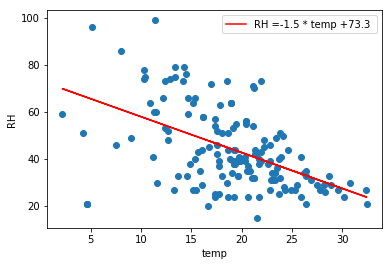

In [223]:
regr=LR()

temp_data=temp.reshape(len(temp),1)
RH_data=RH.reshape(len(RH),1)

temp_train,temp_test,RH_train,RH_test=tts(temp_data,RH_data,test_size=0.3,random_state=87)

regr.fit(temp_train,RH_train)
RH_predict=regr.predict(temp_test)

#計算預測出之方程式
x1=1
x2=2

y1=regr.predict(x1)
y2=regr.predict(x2)

slope=(y2-y1)/(x2-x1)
constant=y1-slope*x1

plt.scatter(temp_test,RH_test)
equation, =plt.plot(temp_test,RH_predict,'r')
plt.xlabel('temp')
plt.ylabel('RH')
plt.legend(handles=[equation],
           labels=['RH =%.1f * temp +%.1f ' % (slope,constant)],
           loc='upper right')
plt.show()

# 藉由本次的數據分析，可得:
## DC-DMC分析
* 該地區之二甲基碳酸酯濃度(DMC)與其乾旱指數(DC)呈現「正相關」。
* 隨著乾旱程度的增加，該地區二甲基碳酸酯濃度上升

## temp-RH分析
* 該地區之氣溫(temp)與其空氣濕度(RH)呈現「負相關」。
* 隨著氣溫的上升，該地區空氣濕度下降。